Task

1.  С использованием средств библиотеки `Pandas` прочитать все данные (в `DataFrame` будет несколько столбцов, в зависимости от варианта, например, у варианта 10 - **Количество звезд**, **Текст рецензии**).
2.  Произвести именование колонок сформированного `DataFrame` в соответствии с рекомендациями, полученными на соответствующей лекции.
3.  Произвести проверку на наличие невалидных значений в колонках (`NaN`, `None` и т.п.). В случае нахождения выполнить обработку таких значений.
4.  Добавить в `DataFrame` столбец, который будет содержать информацию о кол-ве слов в ячейке, содержащей текстовую информацию.
5.  С использованием Pandas вычислить статистическую информацию для столбцов, содержащих числовую информацию.
6.  Написать функцию, которая на вход принимает `DataFrame` и количество слов, а возвращает отфильтрованный по количеству слов `DataFrame`. Условие фильтрации - в новый DataFrame включаются те строки, для которых значение в столбце с количеством слов $\leq$ заданного значения.
7.  Написать функцию, которая на вход принимает `DataFrame` и метку класса (например, **Количество звезд**), а возвращает отфильтрованный по заданной метке `DataFrame`.
8.  Выполнить группировку `DataFrame` по метке класса с вычислением максимального, минимального и среднего значения по количеству слов.
9.  Написать функцию, которая на вход принимает `DataFrame` и метку класса, а возвращает гистограмму для слов. Для расчета гистограммы необходимо будет разбить блоки текста на слова и выполнить процедуру лемматизации для каждого слова (используя библиотеку `nltk`).
10. Выполнить визуализацию гистограммы, полученной из пункта 9, с помощью средств библиотеки `matplotlib`. Соответствующие оси, графики и значения необходимо подписать.


In [17]:
import os
import re
import shutil
import pandas as pd
from typing import Callable

from modules import annotation as ann

Подключение нужных библиотек для работы


In [18]:
ann_base = "ann_base"


current_path = os.getcwd()
parrent_path = os.path.join(current_path, "..")

if not os.path.exists(ann_base):
    os.mkdir(ann_base)

else:
    shutil.rmtree(ann_base)
    os.mkdir(ann_base)


dataset_path = os.path.join("dataset")
ann_path = os.path.join(ann_base, "ann.csv")

df = ann.annotation_dataset(dataset_path, ann_path)
df.drop("rel_path", axis=1, inplace=True)

df.rename(columns={"class": "stars"}, inplace=True)
df

,abs_path,stars
0,/home/nick/Desktop/python/Processing_Data/data...,1
1,/home/nick/Desktop/python/Processing_Data/data...,1
2,/home/nick/Desktop/python/Processing_Data/data...,1
3,/home/nick/Desktop/python/Processing_Data/data...,1
4,/home/nick/Desktop/python/Processing_Data/data...,1
...,...,...
125,/home/nick/Desktop/python/Processing_Data/data...,5
126,/home/nick/Desktop/python/Processing_Data/data...,5
127,/home/nick/Desktop/python/Processing_Data/data...,5
128,/home/nick/Desktop/python/Processing_Data/data...,5


Формирование dataframe из аннотации для упрощения задачи, уже содержатся поля abs_path и stars.


In [19]:
def read_file(path: str) -> str:
    """
    Функция для чтения файла и перевода его в строку
    Parameters
    ----------
    path: str
      Путь к файлу

    Returns
    -------
    str
    Строка, полученная из даннного файла
    """

    with open(path, "r", encoding="utf-8") as file:
        return file.read()


df["text"] = df["abs_path"].apply(read_file)

df.dropna(inplace=True)

df.drop_duplicates(subset=["text"], inplace=True)

df

,abs_path,stars,text
0,/home/nick/Desktop/python/Processing_Data/data...,1,"В тщетных поисках вторых ""Черных кувшинок"" чит..."
1,/home/nick/Desktop/python/Processing_Data/data...,1,Спроси у меня содержание этой книги - я не смо...
2,/home/nick/Desktop/python/Processing_Data/data...,1,Убогий фанфик на Мастера и Маргариту или как я...
3,/home/nick/Desktop/python/Processing_Data/data...,1,"Когда берёшь в руки книгу именитого автора, ла..."
4,/home/nick/Desktop/python/Processing_Data/data...,1,Неосмотрительно купилась на положительные отзы...
...,...,...,...
125,/home/nick/Desktop/python/Processing_Data/data...,5,И вот спустя время мы возвращаемся в Ремисс. И...
126,/home/nick/Desktop/python/Processing_Data/data...,5,С этой историей я знакома давно. Интересный и ...
127,/home/nick/Desktop/python/Processing_Data/data...,5,"Дайни Костелоу знает, как заставить читателя п..."
128,/home/nick/Desktop/python/Processing_Data/data...,5,Отзыв на книгу «Сердцецветы для охотницы» от Т...


Удалим ошибочные строки, удалим дубликаты. Так же выпишем текст по abs_path


In [20]:
def count_words(string: str) -> int:
    """
    Возвращает количество слов в строке
    Parameters
    ----------
    string: str
      Исходная строка

    Returns
    -------
    int
    Количество слов в строке
    """

    cleaned_string = re.sub(r"[^\w\s]", " ", string)

    words = cleaned_string.split()

    return len(words)


df["count_words"] = df["text"].apply(count_words)

df

,abs_path,stars,text,count_words
0,/home/nick/Desktop/python/Processing_Data/data...,1,"В тщетных поисках вторых ""Черных кувшинок"" чит...",109
1,/home/nick/Desktop/python/Processing_Data/data...,1,Спроси у меня содержание этой книги - я не смо...,123
2,/home/nick/Desktop/python/Processing_Data/data...,1,Убогий фанфик на Мастера и Маргариту или как я...,138
3,/home/nick/Desktop/python/Processing_Data/data...,1,"Когда берёшь в руки книгу именитого автора, ла...",117
4,/home/nick/Desktop/python/Processing_Data/data...,1,Неосмотрительно купилась на положительные отзы...,108
...,...,...,...,...
125,/home/nick/Desktop/python/Processing_Data/data...,5,И вот спустя время мы возвращаемся в Ремисс. И...,128
126,/home/nick/Desktop/python/Processing_Data/data...,5,С этой историей я знакома давно. Интересный и ...,117
127,/home/nick/Desktop/python/Processing_Data/data...,5,"Дайни Костелоу знает, как заставить читателя п...",111
128,/home/nick/Desktop/python/Processing_Data/data...,5,Отзыв на книгу «Сердцецветы для охотницы» от Т...,12


Высчитываем количество слов согласно заданию и записываем в новую колонку.


In [21]:
df[df["stars"] == "1"]["count_words"].describe()

count     24.000000
mean     106.875000
std       33.416102
min       19.000000
25%      108.750000
50%      119.500000
75%      124.000000
max      138.000000
Name: count_words, dtype: float64

In [22]:
df[df["stars"] == "2"]["count_words"].describe()

count     26.000000
mean     106.923077
std       33.134783
min       11.000000
25%      110.250000
50%      115.000000
75%      127.250000
max      135.000000
Name: count_words, dtype: float64

In [23]:
df[df["stars"] == "3"]["count_words"].describe()

count     26.000000
mean     105.153846
std       30.114040
min       25.000000
25%       95.750000
50%      118.500000
75%      125.000000
max      135.000000
Name: count_words, dtype: float64

In [24]:
df[df["stars"] == "4"]["count_words"].describe()

count     26.000000
mean     111.730769
std       25.806290
min       31.000000
25%      112.000000
50%      116.000000
75%      128.500000
max      131.000000
Name: count_words, dtype: float64

In [25]:
df[df["stars"] == "5"]["count_words"].describe()

count     26.000000
mean     105.615385
std       29.509425
min       12.000000
25%      108.500000
50%      113.500000
75%      122.250000
max      136.000000
Name: count_words, dtype: float64

Все статстические данные от количества слов


In [26]:
def count_words_filter(df: pd.DataFrame, count_words: int) -> pd.DataFrame:
    """
    Функция для получения DataFrame, состоящий из слов, которые больше count_words

    Parameters
    ----------
    df: pd.DataFrame
        Исходный DataFrame для последующей фильтрации

    count_words: int
        Количество слов, которое должно быть больше

    Returns
    -------
    df.DataFrame
    Отфильтрованный DataFrame
    """

    df_f = df[df["count_words"] >= count_words]
    
    df_f.reset_index(drop=True, inplace=True)

    return df_f

In [27]:
# def class_filter(df: pd.DataFrame, func: Callable, *args, **kwargs) -> pd.DataFrame:

#     """
#     Функция двойной филтрации DataFrame.

#     Parameters
#     ----------
#     df: pd.DataFrame
#         Исходный DataFrame для последующей фильтрации

#     func:
#         Функция филтрации

#     Returns
#     -------
#     df.DataFrame
#     Отфильтрованный DataFrame
#     """

#     df_f = func(df, *args, **kwargs)
#     df_f.reset_index(drop=True,inplace=True)

#     return df_f


def class_filter(df: pd.DataFrame, stars: str) -> pd.DataFrame:
    """
    Функция для получения DataFrame, состоящий звезды значение которых равны stars

    Parameters
    ----------
    df: pd.DataFrame
        Исходный DataFrame для последующей фильтрации

    stars: str
        Количество звёзд

    Returns
    -------
    df.DataFrame
    Отфильтрованный DataFrame
    """

    df_f = df[df["stars"] == stars]
    
    df_f.reset_index(drop=True, inplace=True)

    return df_f

In [28]:
df.groupby("stars").count()

for stars, mini_df in df.groupby("stars"):
    print(f"Stars: {stars}")
    print(f"Max: {mini_df.count_words.max()}")
    print(f"Min: {mini_df.count_words.min()}")
    print(f"Mean: {int(mini_df.count_words.mean())}")
    print("===========================================")

Stars: 1
Max: 138
Min: 19
Mean: 106
Stars: 2
Max: 135
Min: 11
Mean: 106
Stars: 3
Max: 135
Min: 25
Mean: 105
Stars: 4
Max: 131
Min: 31
Mean: 111
Stars: 5
Max: 136
Min: 12
Mean: 105


In [29]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import nltk

nltk.download("punkt")
nltk.download("stopwords")


def histogramma_words(df: pd.DataFrame, stars: str) -> pd.DataFrame:
    
    
    """
    Функция получает на вход pd.DataFrame и по stars возвращает частоту встречаемых слов в конкретном stars

    Parameters
    ----------
    df: pd.DataFrame
        Исходный DataFrame для последующей фильтрации

    stars: str
        Количество звёзд

    Returns
    -------
    collections.Counter
    Возвращает словарь, в котором есть элемент слово, которому соовествует количество встречаемое в тексте
    """

    texts = df[df["stars"] == stars]["text"].str.cat(sep=" ")

    words = word_tokenize(texts)

    words = [word.lower() for word in words]

    # Удаление стоп-слов из текста (не несущие никакой полезной информации)
    stop_words = set(stopwords.words("russian"))

    words = [word for word in words if word.isalnum() and word not in stop_words]

    stemmer = SnowballStemmer("russian")

    lemmatized_words = [stemmer.stem(word) for word in words]

    word_freq = Counter(lemmatized_words)

    dff = pd.DataFrame()

    dff["words"] = word_freq.keys()

    dff["count_words"] = word_freq.values()


    return dff


[nltk_data] Downloading package punkt to /home/nick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Здесь я написал функциию для пункта 8

In [30]:
# from nltk.stem import SnowballStemmer
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import stopwords
# from collections import Counter
# import nltk

# nltk.download("punkt")
# nltk.download("stopwords")



# texts = "Активная активно привет приветствие"
# words = word_tokenize(texts)

# words = [word.lower() for word in words]

#     # Удаление стоп-слов из текста (не несущие никакой полезной информации)
# stop_words = set(stopwords.words("russian"))

# words = [word for word in words if word.isalnum() and word not in stop_words]

# stemmer = SnowballStemmer("russian")

# lemmatized_words = [stemmer.stem(word) for word in words]

# word_freq = Counter(lemmatized_words)

# print(word_freq)

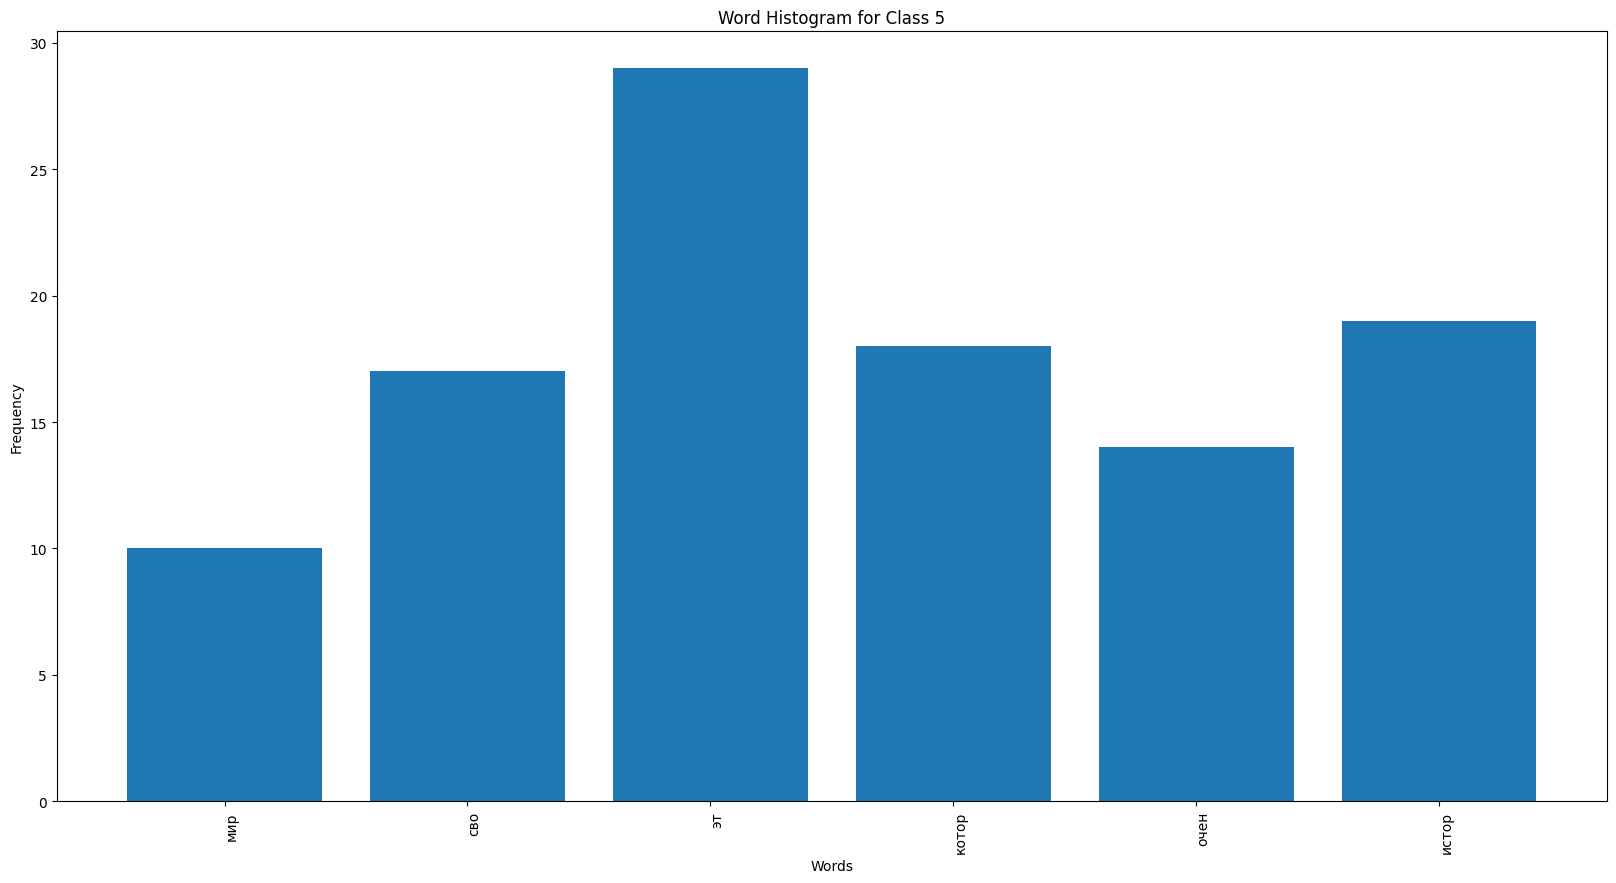

In [32]:
import matplotlib.pyplot as plt

#label по которому ищем
label = "5"

word_freq = histogramma_words(df, label)

#задаётся минимальное количество букв
word_freq = count_words_filter(word_freq, 10)

#print(word_freq)

#какие слова удалить
words_delete = ["развернут", "книг"]
word_plt = word_freq[~word_freq['words'].isin(words_delete)]


#рисовашка
plt.figure(figsize=(20, 10))

plt.bar(word_plt["words"], word_plt["count_words"])

plt.xlabel('Words')

plt.ylabel('Frequency')

plt.title(f'Word Histogram for Class {label}')

plt.xticks(rotation=90, ha='left')

plt.show()